<a href="https://colab.research.google.com/github/rishita-verma01/102117059_Topsis-for-pretrained-models/blob/main/102117059_Topsis_for_pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


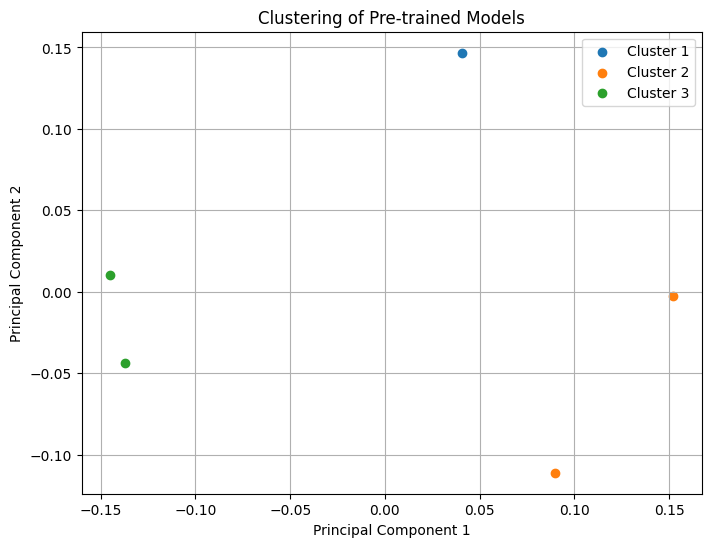

Results:
     Model  Cluster
0  Model 1        3
1  Model 2        1
2  Model 3        3
3  Model 4        2
4  Model 5        2


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Define the performance matrix
performance_matrix = np.array([
    [0.85, 0.75, 0.90, 0.80, 0.70],  # Text Summarization
    [0.75, 0.90, 0.80, 0.70, 0.85],  # Text Generation
    [0.90, 0.80, 0.85, 0.75, 0.70],  # Text Classification
    [0.80, 0.70, 0.75, 0.85, 0.90],  # Text Sentence Similarity
    [0.70, 0.85, 0.70, 0.90, 0.80]   # Text Conversational
])

# Define tasks
tasks = ["Text Summarization", "Text Generation", "Text Classification", "Text Sentence Similarity", "Text Conversational"]

# Perform KMeans clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(performance_matrix.T)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
transformed_matrix = pca.fit_transform(performance_matrix.T)

# Create a DataFrame for results
results_df = pd.DataFrame({
    "Model": [f"Model {i+1}" for i in range(performance_matrix.shape[1])],
    "Cluster": cluster_labels + 1
})

# Plotting
plt.figure(figsize=(8, 6))
for cluster in range(1, n_clusters + 1):
    cluster_indices = results_df[results_df['Cluster'] == cluster].index
    plt.scatter(transformed_matrix[cluster_indices, 0], transformed_matrix[cluster_indices, 1], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Pre-trained Models')
plt.legend()
plt.grid(True)
plt.show()

# Display results table
print("Results:")
print(results_df)
